<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/CV7b_RegionBasedSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -l -s https://github.com/cagBRT/computer-vision.git cloned-repo
%cd cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 3894, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 3894 (delta 111), reused 106 (delta 59), pack-reused 3689
Receiving objects: 100% (3894/3894), 441.07 MiB | 15.33 MiB/s, done.
Resolving deltas: 100% (1446/1446), done.
Updating files: 100% (2300/2300), done.
/content/cloned-repo


# **Region-based Segmentation**
Using the pixel values of different objects is a way to do image segmentation. <br> This technique determines a region directly.<br>

Region-based segmentation is a pixel based method.


**Threshold segmentation**<br>
If there is enough contrast between regions, a threshold can be set. If a pixel is above the threshold, it belongs to one region.<br>
If the pixel is below the threshold, it belings to the other region<br>

**Import libraries**

In [2]:
from skimage.color import rgb2gray
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

**Begin with an image**<br>
Plot the image

In [3]:
image = plt.imread('/content/cloned-repo/images/sailboats.jpg')

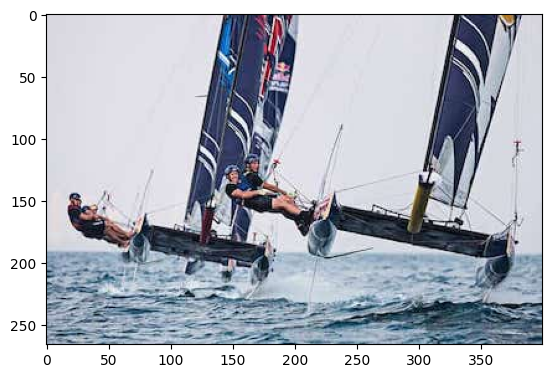

In [4]:
image.shape
plt.imshow(image)

**Convert the image to gray scale**<br>


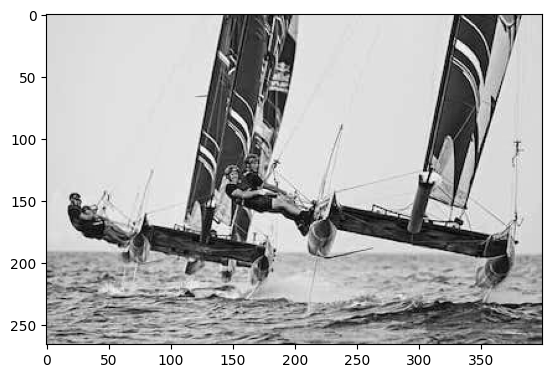

In [5]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

**Thresholding**<br>
Once the image is in gray scale, we need to apply a threshold to it. <br>
The threshold will decide which pixels belong to which shape. Depending upon their values pixels will be classified as being in one object or another. <br>
<br>
Correct thresholding leads to better segmentation. <br>



**Plot the histogram of the image**

The numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)

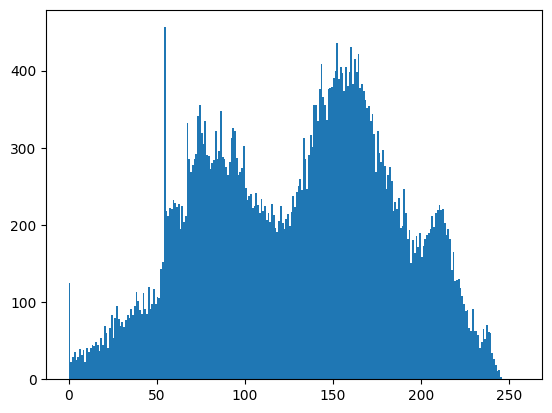

In [6]:
img = cv2.imread('images/1.jpeg',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

Selecting a good threshold is important for good segmentation. The best thresholds exist when the histogram peaks are separated by deep valleys, as shown in the image below.  

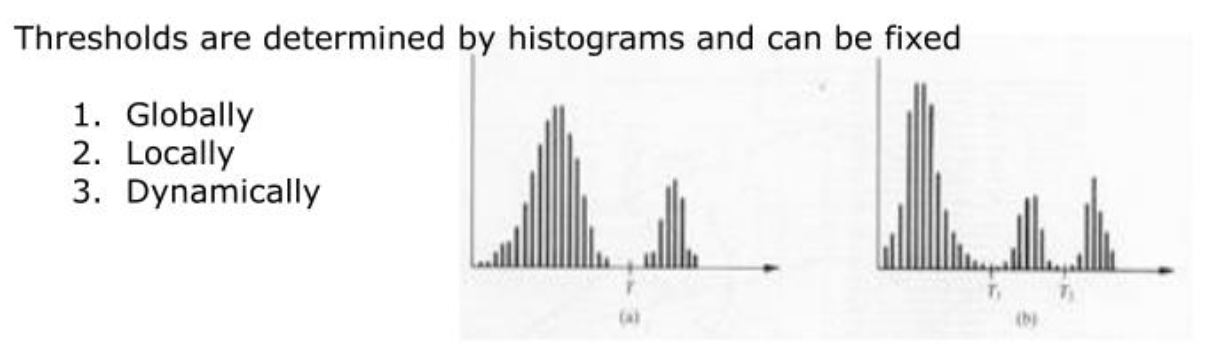

In [7]:
from IPython.display import Image
Image("images/thresholding.png", width=640)

**Apply a threshold**

1. find the shape of the image

In [8]:
gray.shape

(266, 400)

2. The height and width of the image is 192 and 263, which means there are 50,496 pixels. <br>
3. Take the mean of the pixel values and use that as a threshold. <br>

*   If the pixel value is more than our threshold, we can say that it belongs to an object
*   If the pixel value is less than the threshold, it will be treated as the background.

The dark region is the background<br>
The light region is the foreground

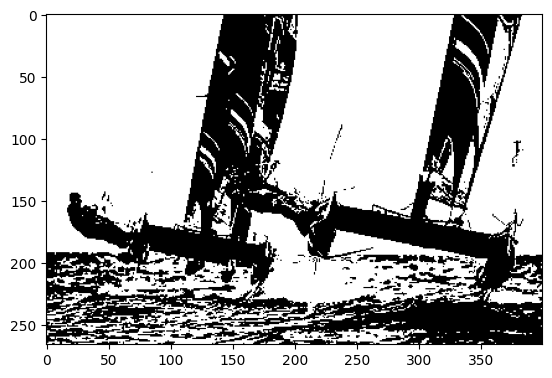

In [9]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')
plt.show()

**Create multiple regions**<br>
Different thresholds will lead to different regions.<br>

There are four segments shown in the image below. <br>
**The advantages of this method are**: <br>


*   Calculations are simpler
*   Fast operation speed
*.  When the neighboring regions have high contrast, the method works well

The disadvantages of this method are: <br>
When the grayscale difference between neighboring regions is small, it can be harder to be accurate.


Create regions of segmentation using different thresholds

In [10]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
print(gray_r.mean())
print(gray_r.shape[0])

0.663124125807165
106400


Assign each pixel to one of four segmentations

In [11]:
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0

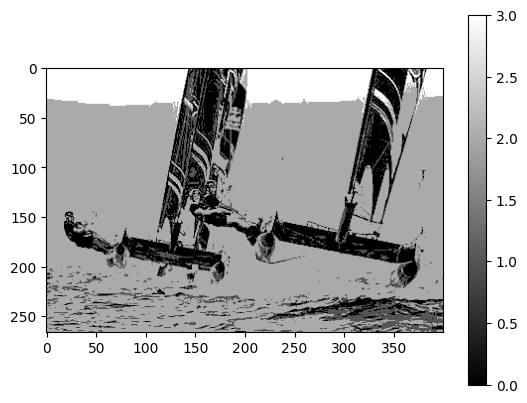

In [12]:
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')
plt.colorbar()
plt.show()

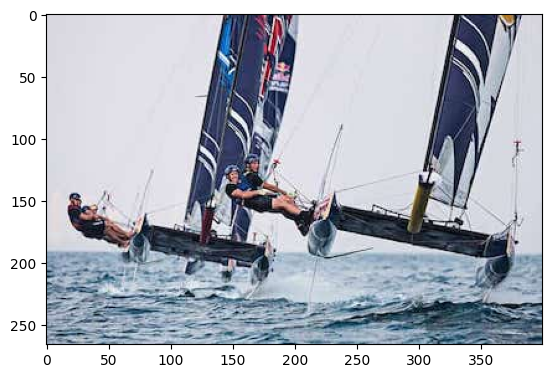

In [13]:
image.shape
plt.imshow(image)

#**Assignment**<br>
Use the region-based segmentation method on one of the following images. <br>
>/content/cloned-repo/images/City-trip-and-fall.jpg<br>
/content/cloned-repo/images/cabinLandscape.jpeg<br>
/content/cloned-repo/images/sailboats.jpg